# Visualization with Seaborn
Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired. There are several valid complaints about Matplotlib that often come up:

Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.
An answer to these problems is Seaborn. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

To be fair, the Matplotlib team is addressing this: it has recently added the plt.style tools discussed in Customizing Matplotlib: Configurations and Style Sheets, and is starting to handle Pandas data more seamlessly. The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo. But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Vs Matplotlib

Here is an exmaple of a simple random-walk plot in Matplotlib.

In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


Now we create some random walk data:

In [7]:
# Create data

rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

simple plot

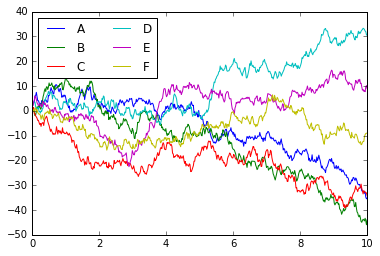

In [11]:
# plot ata with matplotlib defaults

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns:

In [15]:
import seaborn as sns
sns.set()

Now let's do the same, but instead use Seaborn

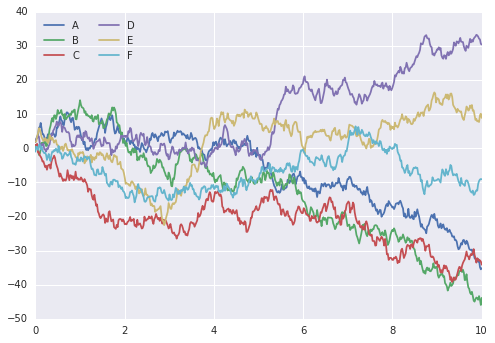

In [16]:
# same code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Not that all of the following could be done using raw Matplotlib commands (this is, in fact, what SEABORN does un the hood) but the Seaborn API is convenient.

## Histograms, KDE, and densities

Often in statistical data visualizations, all you want is to plot histograms and join distrubitutions of variables. We have seen that this is relatively straightforward in Matplotlib.

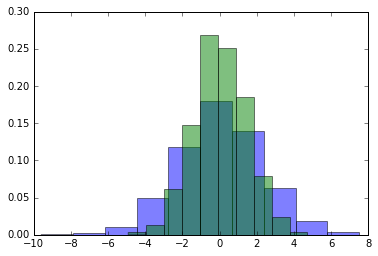

In [13]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

Instead of a histogram, we can smooth out the estimate using KDE (Kernel density estimation)

C:\Users\ElPanda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


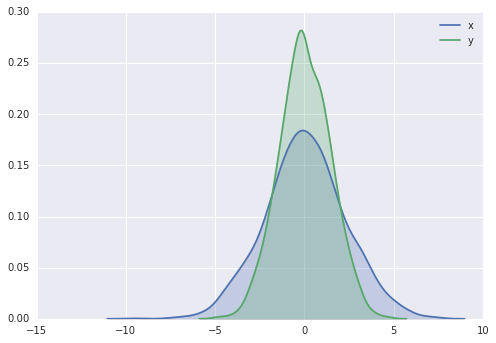

In [19]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

The combination of the two can also be done using distplot


C:\Users\ElPanda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


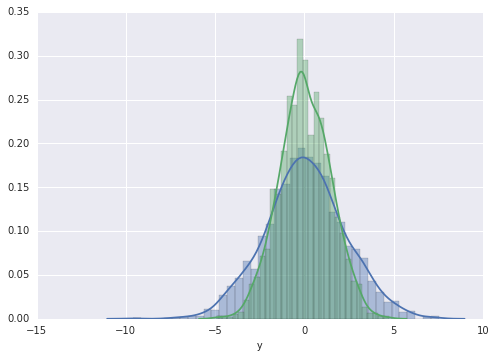

In [21]:
sns.distplot(data['x'])
sns.distplot(data['y'])

If we pass the two-dimensional dataset to kdeplot, we will get two-dimensional visualization of the data.

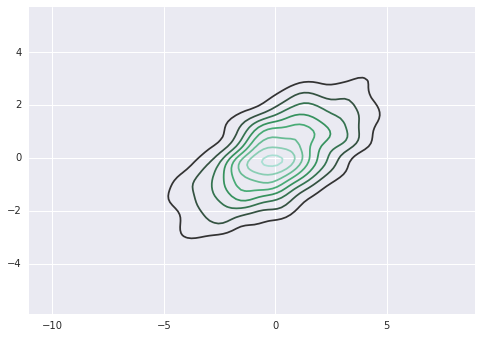

In [23]:
sns.kdeplot(data)

We can see the join distribution and the marginal distributions together using sns.jointplot. For this plot, we'll set the style to a white background:



C:\Users\ElPanda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


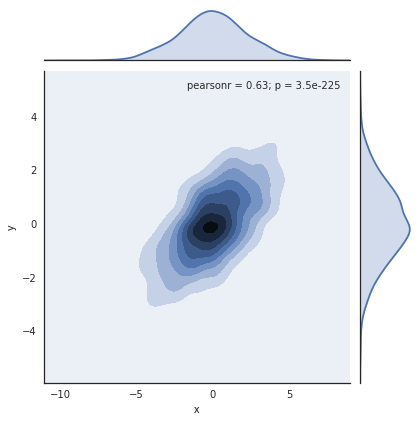

In [26]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

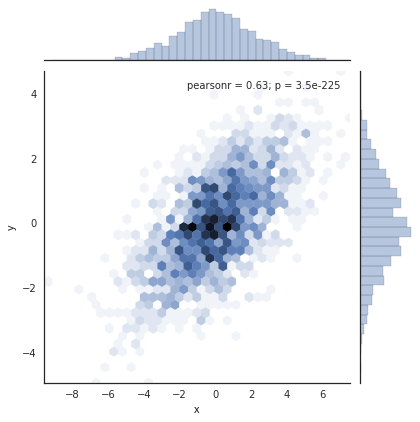

In [28]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [29]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples easy using sns.pairplot

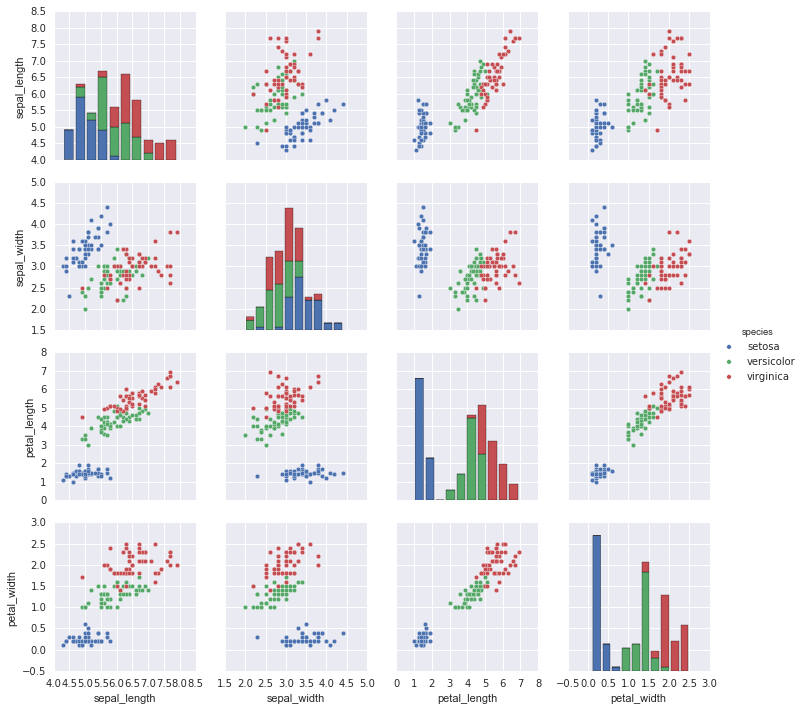

In [31]:
sns.pairplot(iris, hue='species', size=2.5)

## Faceted Histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's facetGrid makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various data:


In [32]:
tips = sns.load_dataset('tips')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


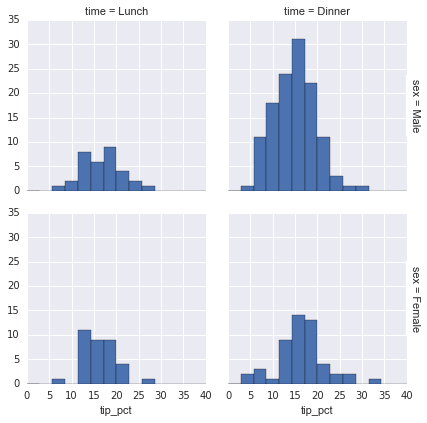

In [38]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles='True')
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

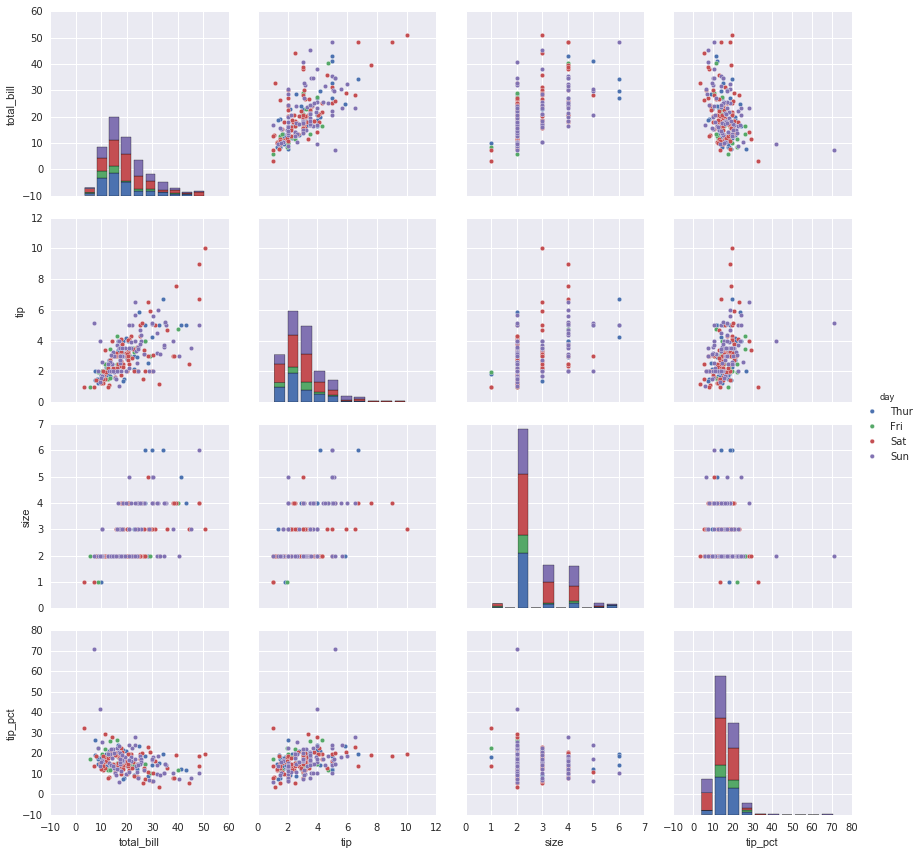

In [40]:
sns.pairplot(tips, hue='day', size=3)

## Factor Plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribtuion of a parameters within bins defined by any other parameter.

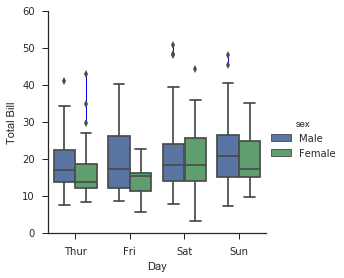

In [41]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

## joint Distributions

Similiar to the pairplot we saw ealier, we can use the sns.jointplot to show the joint distribution between different datasets, along the associated marginal distributions:


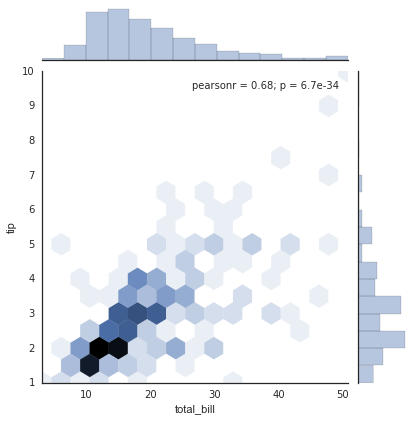

In [44]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

C:\Users\ElPanda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


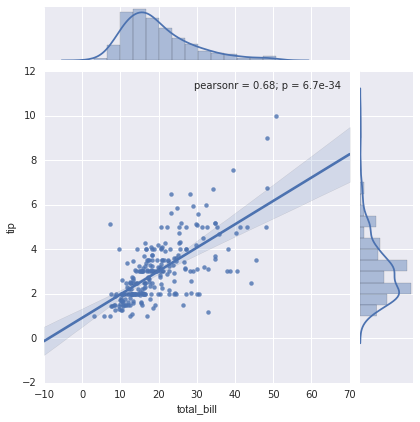

In [46]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

# Bar plots

Time series can be plotted using sns.factorplot. In the following example, we'll use the Planets data.

In [48]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


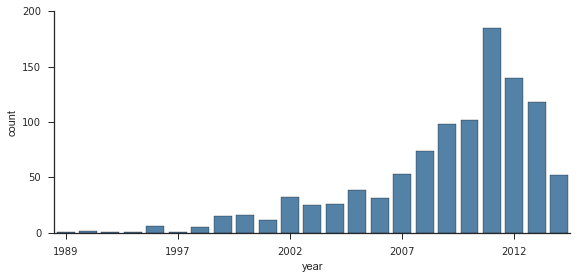

In [55]:
with sns.axes_style('ticks'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets

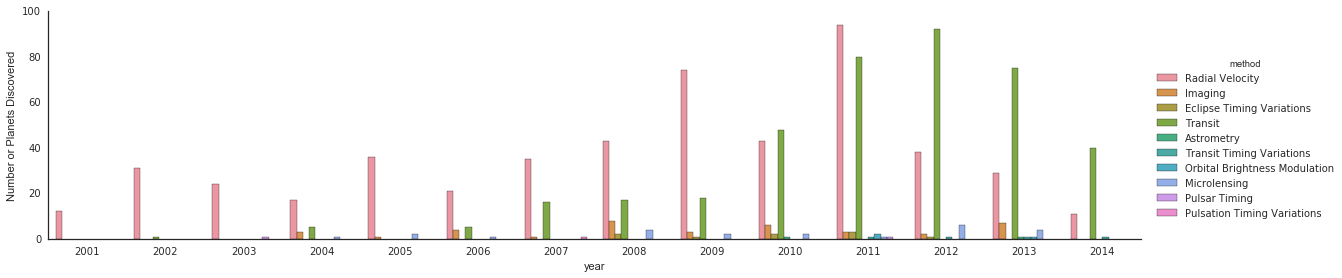

In [65]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4, kind='count', # changing aspect changes size
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number or Planets Discovered')

## Examp[le: Exploring Marathon Finishing Times

Here we will obviously use Seaborn to visualize and understand the marathon. Check out this scraped data.

In [66]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 22  836k   22  191k    0     0   180k      0  0:00:04  0:00:01  0:00:03  182k
 80  836k   80  671k    0     0   330k      0  0:00:02  0:00:02 --:--:--  333k
100  836k  100  836k    0     0   336k      0  0:00:02  0:00:02 --:--:--  339k


In [71]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type object); we can see this by looking at the dtypes attribute.

In [72]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [ ]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datatools.timedelta(hours)